In [1]:
!pip install nibabel opencv-python matplotlib


     |████████████████████████████████| 3.3 MB 1.4 MB/s eta 0:00:01
  Using cached numpy-2.0.2-cp39-cp39-macosx_10_9_x86_64.whl (21.2 MB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 2.0.2 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 2.0.2 which is incompatible.


In [12]:
import nibabel as nib
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load NIfTI image
ct_path = "/Users/olihiidikwu/Downloads/Task07_Pancreas/imagesTr/pancreas_007.nii.gz"

img_nifti = nib.load(ct_path)
img_data = img_nifti.get_fdata()

# Choose a slice index
slice_index = 50  # adjust as needed
image_slice = img_data[:, :, slice_index]

# Normalize to 0–255
image_norm = ((image_slice - np.min(image_slice)) / (np.max(image_slice) - np.min(image_slice)) * 255).astype(np.uint8)

# Convert to RGB
image_rgb = cv2.cvtColor(image_norm, cv2.COLOR_GRAY2RGB)

# Display
plt.figure(figsize=(5, 5))
plt.imshow(image_rgb)
plt.title(f"CT Slice #{slice_index}")
plt.axis('off')
plt.show()


FileNotFoundError: No such file or no access: '/Users/olihiidikwu/Downloads/Task07_Pancreas/imagesTr/pancreas_007.nii.gz'

In [13]:
pip install numpy==1.22

Note: you may need to restart the kernel to use updated packages.


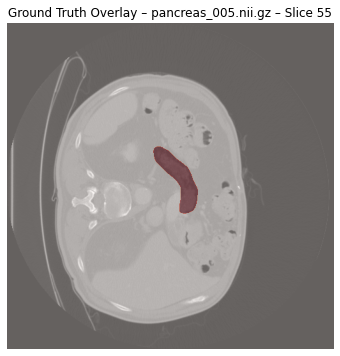

In [41]:
import nibabel as nib
import cv2
import numpy as np
import matplotlib.pyplot as plt

# MATCHED FILES
image_path = "/Users/olihiidikwu/Downloads/Task07_Pancreas/imagesTr/pancreas_005.nii.gz"
label_path = "/Users/olihiidikwu/Downloads/Task07_Pancreas/labelsTr/pancreas_005.nii.gz"

# Load image and label
img_data = nib.load(image_path).get_fdata()
label_data = nib.load(label_path).get_fdata()

# Choose a good slice (you can adjust between 50–90)
slice_index = 55
image_slice = img_data[:, :, slice_index]
gt_mask = label_data[:, :, slice_index]
gt_mask = (gt_mask > 0).astype(np.uint8)

# Normalize and convert to RGB
image_norm = ((image_slice - np.min(image_slice)) / (np.max(image_slice) - np.min(image_slice)) * 255).astype(np.uint8)
image_rgb = cv2.cvtColor(image_norm, cv2.COLOR_GRAY2RGB)

# Display
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.imshow(gt_mask, alpha=0.4, cmap='Reds')
plt.title("Ground Truth Overlay – pancreas_005.nii.gz – Slice 55")
plt.axis('off')
plt.show()


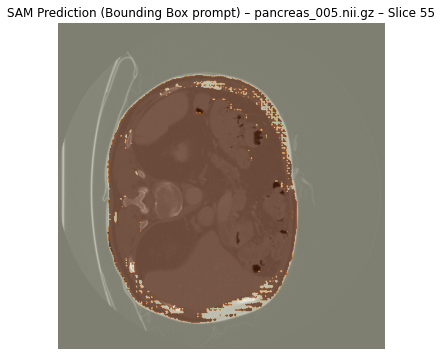

In [46]:
# Initialize SAM
predictor = SamPredictor(sam)  # assuming 'sam' is loaded
predictor.set_image(image_rgb)

# Use a point prompt at a rough center of the pancreas
input_box = np.array([[140, 170, 300, 280]])  # Adjust these if needed

input_label = np.array([1])  # 1 = foreground

# Generate mask
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True
)

# Show result
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.imshow(masks[0], alpha=0.5, cmap='YlOrBr')
plt.title("SAM Prediction (Bounding Box prompt) – pancreas_005.nii.gz – Slice 55")
plt.axis('off')
plt.show()


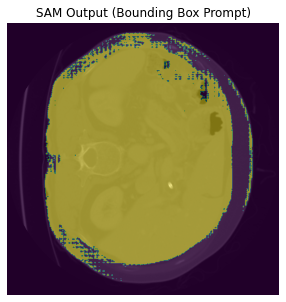